In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn import *

In [7]:
## Loading the input solar and weather csv files

solardata = pd.read_csv(r'manipulated_15minute_data_austin.csv')
solardata.head()

weatherdata = pd.read_csv(r'Compiled Weather Data.csv')
weatherdata.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Austin, TX",2018-01-01 0:00:00,26.9,17.2,21.1,78.65,0.0,NaN,NaN,0,...,1038.3,100.0,9.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"KATT,KAUS,72064800230,72254013904,72254413958"
1,"Austin, TX",2018-01-01 1:00:00,26.0,15.5,19.6,76.30,0.0,NaN,NaN,0,...,1038.1,100.0,9.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"KATT,KAUS,72064800230,KEDC,72254013904,7225441..."
2,"Austin, TX",2018-01-01 2:00:00,26.0,14.2,16.8,67.94,0.0,NaN,NaN,0,...,1038.6,100.0,9.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"KATT,KAUS,72064800230,KEDC,72254013904,7225441..."
3,"Austin, TX",2018-01-01 3:00:00,26.0,15.1,15.9,65.31,0.0,NaN,NaN,0,...,1039.4,100.0,9.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"KATT,KAUS,72064800230,KEDC,72254013904,7225441..."
4,"Austin, TX",2018-01-01 4:00:00,26.0,15.5,15.6,64.45,0.0,NaN,NaN,0,...,1039.7,100.0,9.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"KATT,KAUS,72064800230,KEDC,72254013904,7225441..."


In [11]:
# SOLAR: Overview of numeric variables in the dataset, includes info about % missing data
numericSummary = solardata.describe()

nanPercentages = []
numRows = solardata.shape[0]
columns = list(numericSummary)
for column in columns:
    nanCount = solardata[column].isna().sum()
    nanPercentage = round((nanCount*100/ numRows), 4)
    nanPercentages.append(nanPercentage)

numericSummary.loc[len(numericSummary.index)] = nanPercentages
numericSummary = numericSummary.rename(index={8: 'Percentage NaN'})
numericSummary

,dataid,grid,solar,leg1v,leg2v
count,873286.000000,868096.000000,659989.000000,867416.000000,867416.000000
mean,5856.353757,0.857761,0.740107,122.254016,122.348818
std,2766.219429,1.657344,1.198945,1.470499,1.535874
min,661.000000,-7.650000,-0.068000,0.000000,0.000000
25%,3456.000000,0.289000,-0.006000,121.735000,121.835000
50%,6139.000000,0.604000,-0.001000,122.377000,122.498000
75%,8156.000000,1.467000,1.078000,122.918000,123.047000
max,9922.000000,16.461000,8.687000,601.954000,601.811000
Percentage NaN,0.000000,0.594300,24.424600,0.672200,0.672200


In [12]:
# WEATHER: Overview of numeric variables in the dataset, includes info about % missing data
numericSummary = weatherdata.describe()

nanPercentages = []
numRows = weatherdata.shape[0]
columns = list(numericSummary)
for column in columns:
    nanCount = weatherdata[column].isna().sum()
    nanPercentage = round((nanCount*100/ numRows), 4)
    nanPercentages.append(nanPercentage)

numericSummary.loc[len(numericSummary.index)] = nanPercentages
numericSummary = numericSummary.rename(index={8: 'Percentage NaN'})
numericSummary

,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,0.0,0.0,3695.0,3695.0,819.000000,3695.000000,3675.000000,3695.000000,3695.000000,3695.000000,2067.000000,2067.000000,2067.000000,0.0
mean,73.498398,63.657294,47.203762,59.072333,0.011943,NaN,NaN,0.0,0.0,22.475336,6.161434,146.462857,1017.176238,36.455237,10.672287,320.226415,1.150508,3.170779,NaN
std,17.799095,25.915007,22.427080,22.174582,0.330444,NaN,NaN,0.0,0.0,6.760845,4.037126,103.170892,6.845217,37.456594,2.839431,271.711429,0.979111,2.768821,NaN
min,17.800000,8.500000,1.000000,9.380000,0.000000,NaN,NaN,0.0,0.0,16.100000,0.000000,0.000000,1003.100000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,63.200000,38.400000,22.400000,39.780000,0.000000,NaN,NaN,0.0,0.0,18.300000,3.600000,49.000000,1012.700000,6.200000,9.900000,59.000000,0.200000,1.000000,NaN
50%,76.900000,67.900000,56.600000,58.980000,0.000000,NaN,NaN,0.0,0.0,20.700000,6.100000,160.000000,1015.400000,20.100000,9.900000,244.000000,0.900000,2.000000,NaN
75%,86.400000,85.800000,67.200000,79.295000,0.000000,NaN,NaN,0.0,0.0,24.200000,8.400000,200.000000,1019.800000,76.100000,9.900000,561.500000,2.000000,6.000000,NaN
max,108.800000,109.800000,75.800000,100.000000,18.610000,NaN,NaN,0.0,0.0,57.400000,24.100000,360.000000,1043.500000,100.000000,16.000000,916.000000,3.300000,9.000000,NaN
Percentage NaN,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,100.0,0.0,0.0,77.834900,0.000000,0.541300,0.000000,0.000000,0.000000,44.059500,44.059500,44.059500,100.0


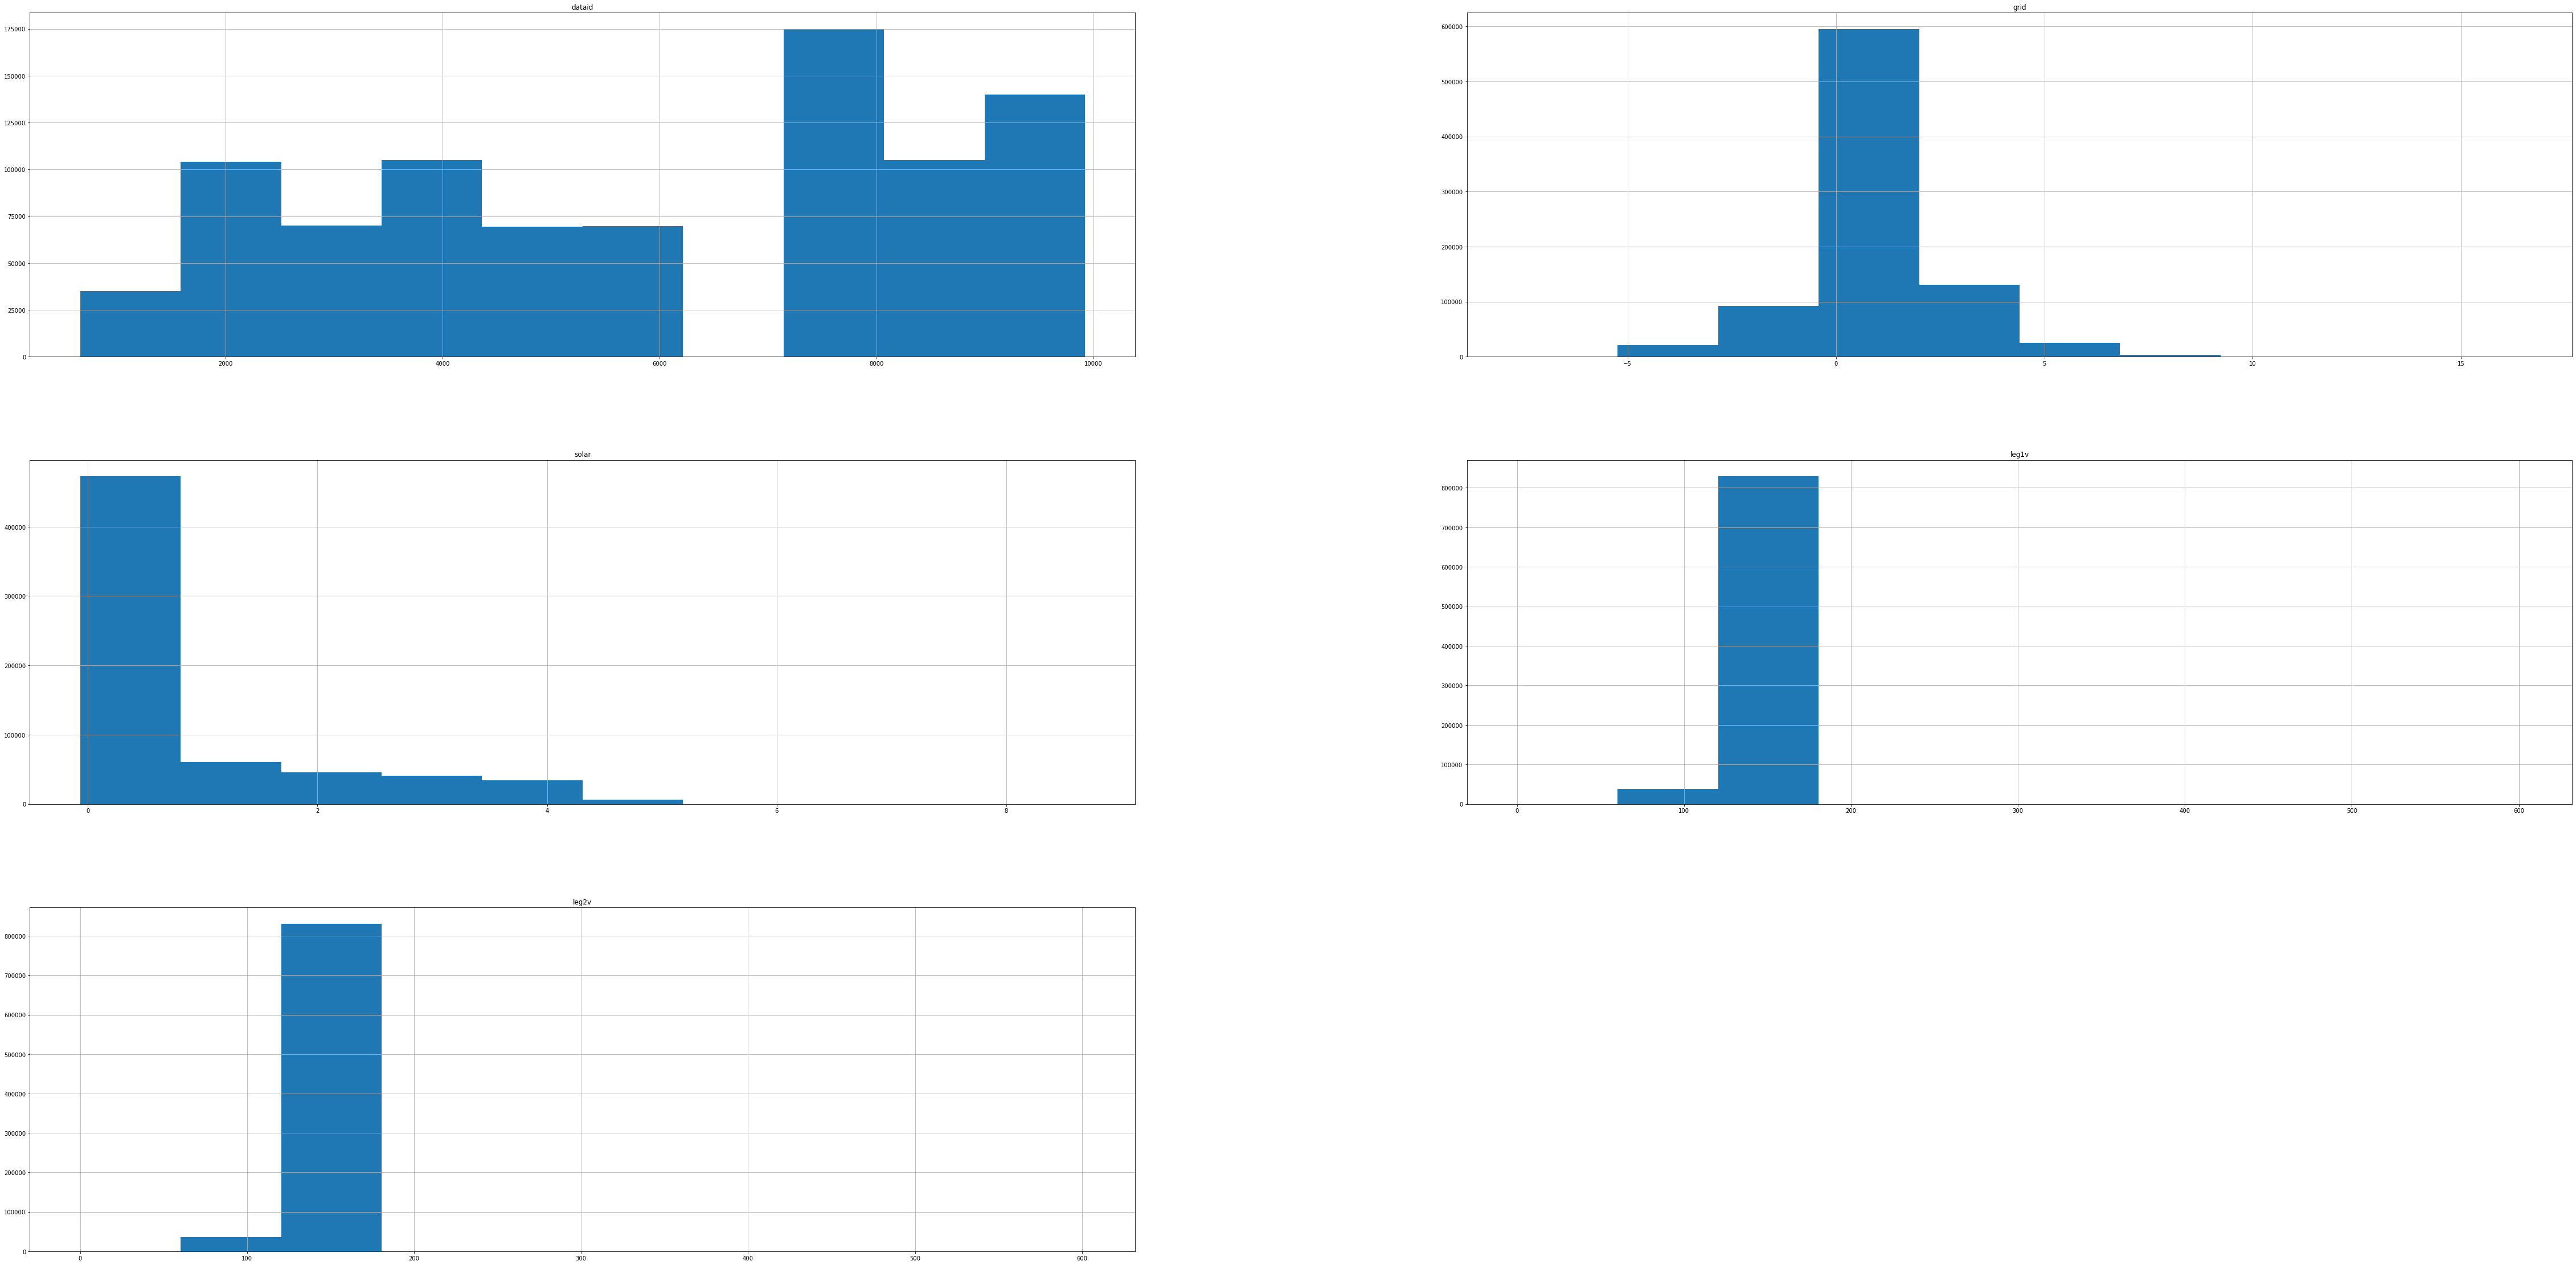

In [14]:
# SOLAR: Plotting histograms of numeric variables
solardata.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.show()

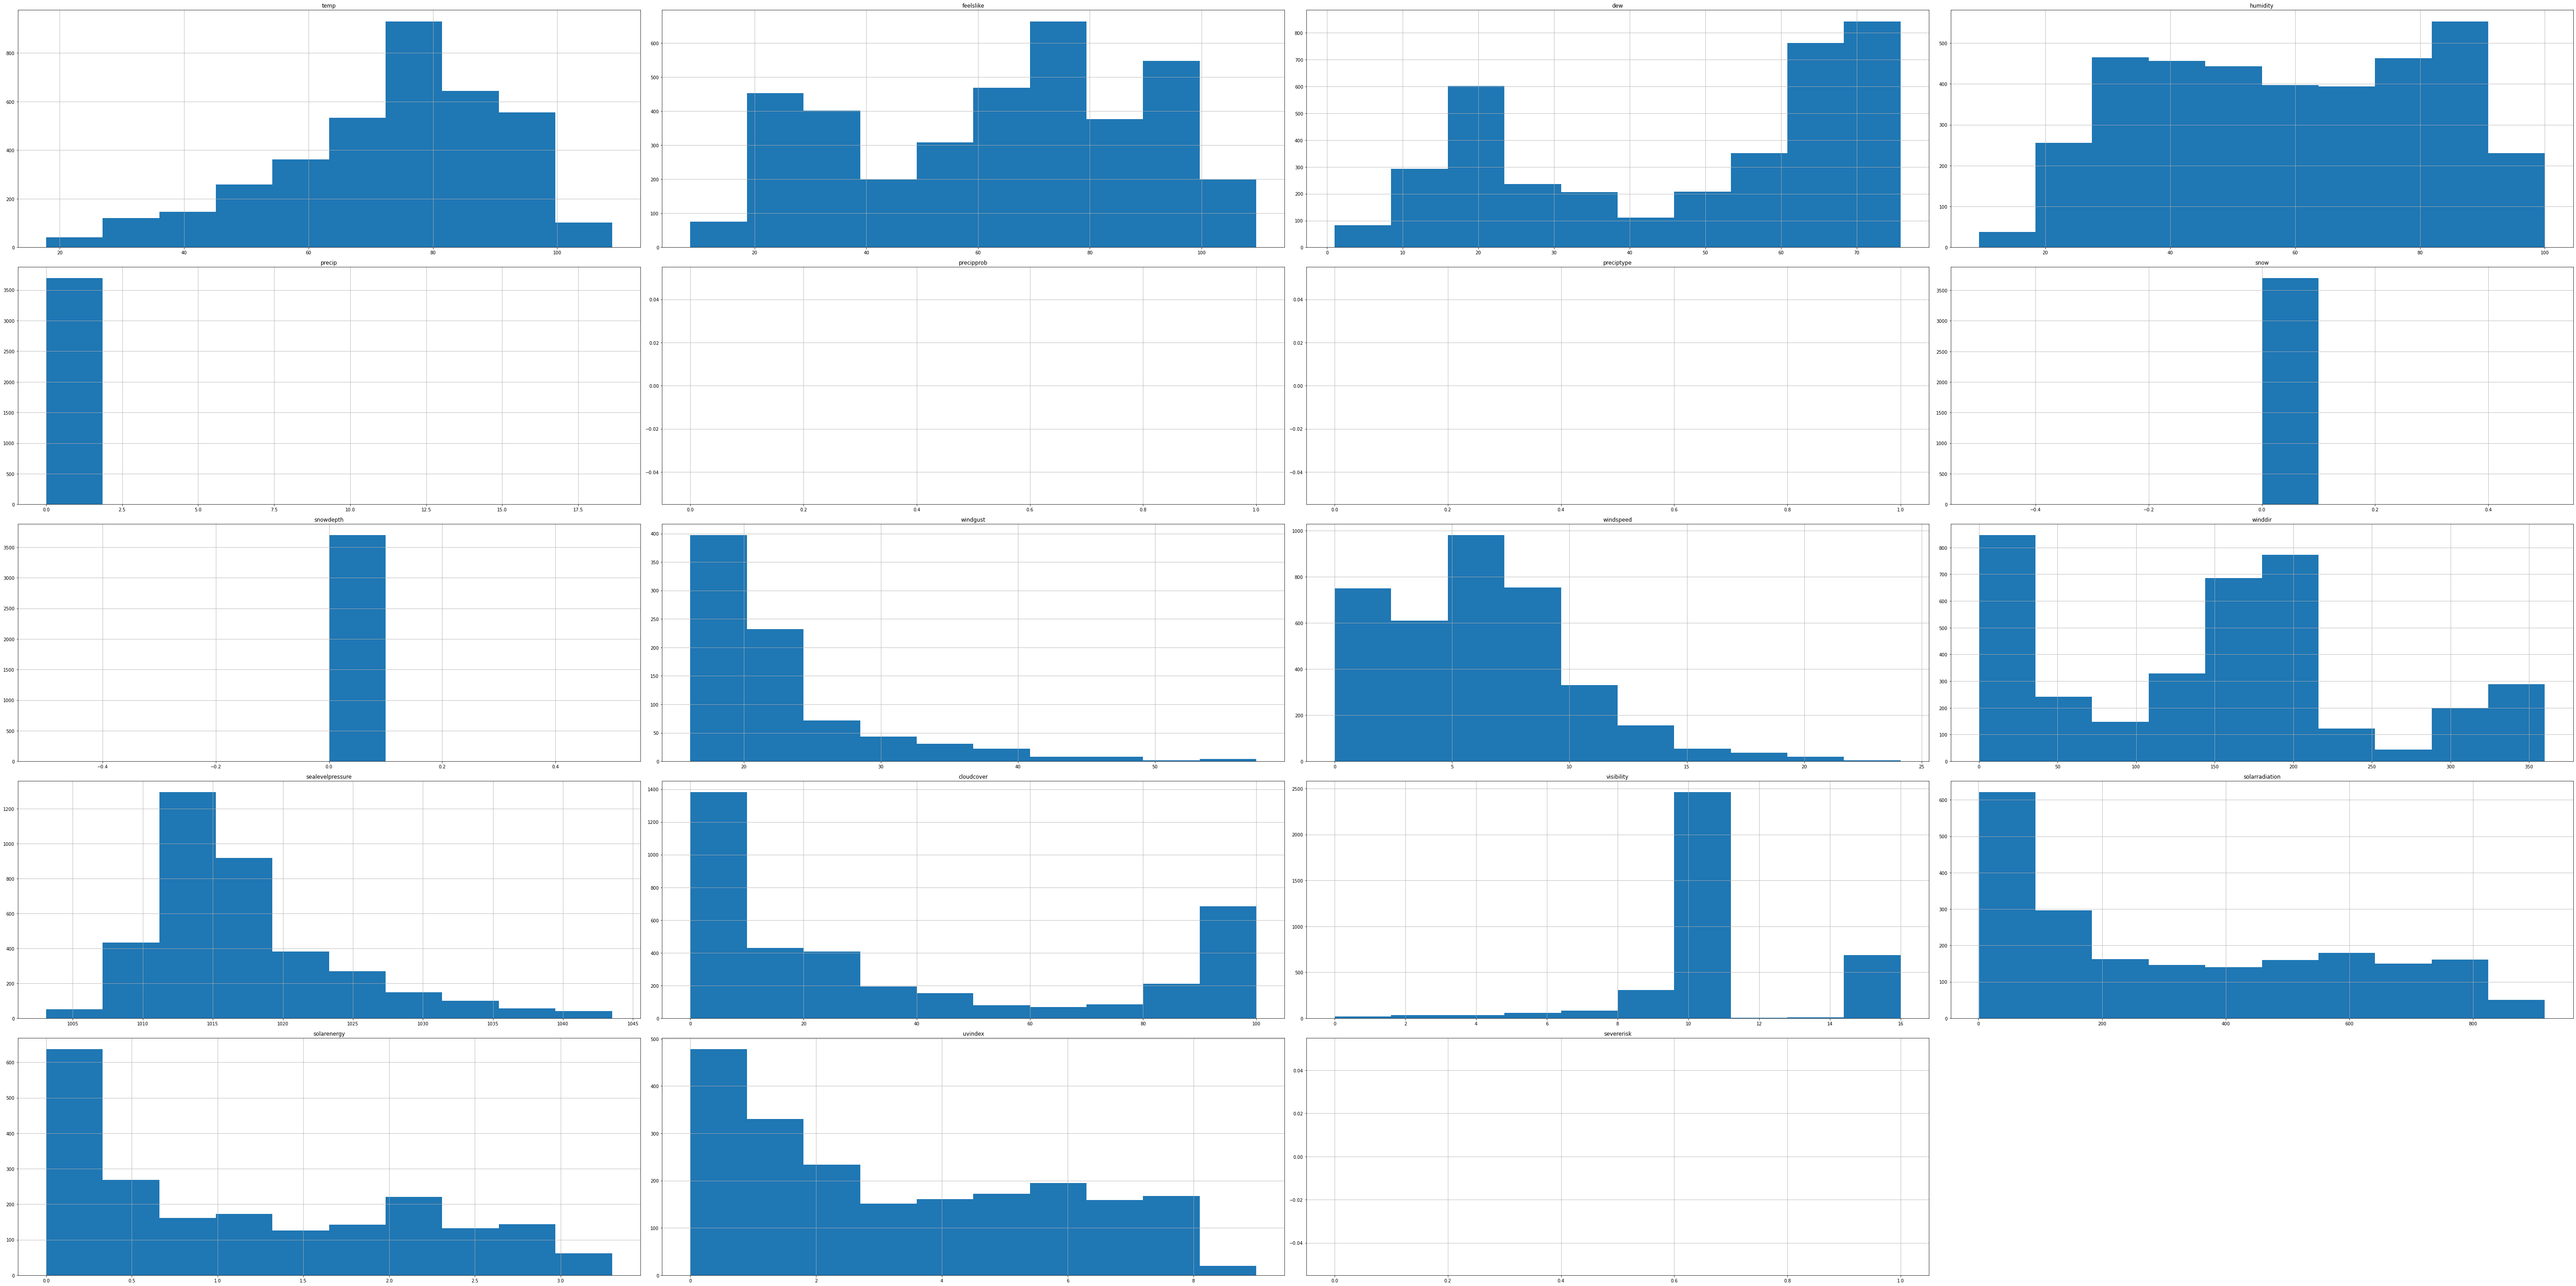

In [16]:
# WEATHER: Plotting histograms of numeric variables
weatherdata.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.tight_layout()
plt.show()

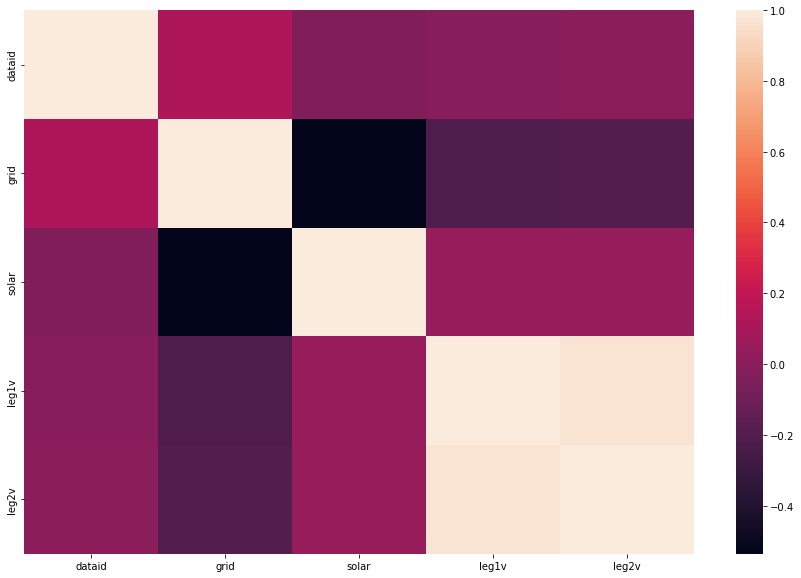

In [17]:
# SOLAR: Correlation matrix
correlationMatrix = solardata.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()

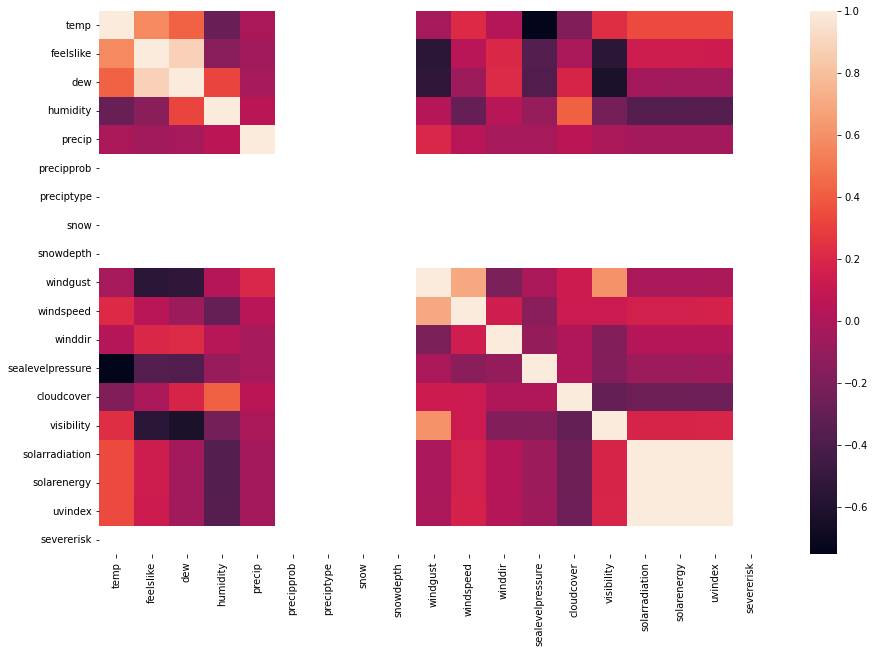

In [18]:
# WEATHER: Correlation matrix
correlationMatrix = weatherdata.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()

In [19]:
## WEATHER + SOLAR ESTIMATE: Finding top feature correlations

pastIndices = []
correlatedPairs = pd.DataFrame(columns=['Product 1', 'Product 2', 'Correlation'])

for index, row in correlationMatrix.iterrows():       #iterates through each row in the correlation matrix

    for index1 in pastIndices:                        #collects tuples of each unique pair along with their correlation (not counting self pairs)
        tup = (index, index1, row[index1])
        correlatedPairs.loc[len(correlatedPairs.index)] = [index, index1, row[index1]]

    pastIndices += [index]

correlatedPairs = correlatedPairs.dropna().sort_values(by='Correlation', ascending=False)
correlatedPairs.head(40)

,Product 1,Product 2,Correlation
135,solarenergy,solarradiation,0.999545
151,uvindex,solarradiation,0.994967
152,uvindex,solarenergy,0.994462
2,dew,feelslike,0.881390
54,windspeed,windgust,0.694552
100,visibility,windgust,0.604406
0,feelslike,temp,0.571084
1,dew,temp,0.419645
81,cloudcover,humidity,0.413716
105,solarradiation,temp,0.341721


In [20]:
# SOLAR: Overview of the string variables in the dataset
stringSummary = solardata.describe(include='object')

nanPercentages = []
numRows = solardata.shape[0]
columns = list(stringSummary)
for column in columns:
    nanCount = solardata[column].isna().sum()
    nanPercentage = round((nanCount*100/ numRows), 4)
    nanPercentages.append(nanPercentage)

stringSummary.loc[len(stringSummary.index)] = nanPercentages
stringSummary = stringSummary.rename(index={4: 'Percentage NaN'})
stringSummary

,local_15min
count,873286
unique,35036
top,11/21/2018 15:15
freq,25
Percentage NaN,0.0


In [21]:
# WEATHER: Overview of the string variables in the dataset
stringSummary = weatherdata.describe(include='object')

nanPercentages = []
numRows = weatherdata.shape[0]
columns = list(stringSummary)
for column in columns:
    nanCount = weatherdata[column].isna().sum()
    nanPercentage = round((nanCount*100/ numRows), 4)
    nanPercentages.append(nanPercentage)

stringSummary.loc[len(stringSummary.index)] = nanPercentages
stringSummary = stringSummary.rename(index={4: 'Percentage NaN'})
stringSummary

,name,datetime,conditions,icon,stations
count,3695,3695,3695,3695,3695
unique,3,3695,7,8,33
top,"Austin, TX",2018-01-01 0:00:00,Clear,clear-night,"KATT,KAUS,72064800230,KEDC,72254013904,7225441..."
freq,2232,1,1809,1000,1286
Percentage NaN,0.0,0.0,0.0,0.0,0.0


# Key Findings

## Weather Data
-Overall, the weather data is pretty comprehensive and doesn't have much missing data, except...
    -Missing precipitation likelihood and type, which could possibly impact solar output
    -"solarradiation", "solarenergy", and "uvindex" appear to be blank when the sun is down
    -Missing "severerisk" column. Not sure what this represents or if it would be relevant
-Weather conditions include: clear, cloudy, partially cloudy, rain (overcast), rain (partially cloudy). These 5 conditions could be very useful for our model, but we would need to figure out how to use non-numerical variables as inputs to our NN.

## Solar Data
-We have access to solar data for many households in the austin area, each with different sizes of solar installations and at different orientations (e.g north/west/east). We could take advantage of this orientation information to improve the accuracy of our forecasting models.
-7 houses and about 25% of solar data is missing solar output data. With ~900,000 data points, this shouldn't be an issue.

## Other Results
-Temperature is a factor we should consider as an input feature to our models. It seems loosely correlated with solar energy (.33)

## Next Steps
-Data looks sufficient for modelling! Key features that will be important for modelling include, but are not limited to: Solar radiation, temperature, solar installation size, solar installation orientation

-Plot variables by time to see if there are any predictable trends over time
-Merge weather and solar data to observe more detailed correlations between variables